In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)
print(df.shape)
df.head()

(3539, 18)


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [2]:
# missing data - no missing data 
# df_na = (df.isnull().sum() / len(df)) * 100
# df_na = df_na.drop(df_na[df_na ==0].index).sort_values(ascending=False)
# df_na
df.isnull().sum()
print("No Missing Data")

No Missing Data


In [4]:
# there are 2 categorical variables. Lets investigate them
print(df.neighborhood.nunique())
df.neighborhood.value_counts()

# so this is our only categorical variable. I plan on one-hot encoding this variable, as there is only one categorical one. 

32


Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Tribeca                119
Midtown                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
East Harlem             41
Lower East Side         41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Little Italy             3
Stuyvesant Town/PCV      3
West Harlem              2
Manhattanville           1
Name: neighborhood, dtype: int64

In [5]:
# borough is unnecessary column. This data might be just a part of a larger data
print(df.borough.nunique())
df.borough.value_counts()

1


Manhattan    3539
Name: borough, dtype: int64

In [6]:
df.corr().rent.sort_values()

rental_id          -0.134347
building_age_yrs   -0.128895
no_fee             -0.101497
has_patio           0.029302
has_doorman         0.031302
min_to_subway       0.035164
has_roofdeck        0.035165
has_gym             0.040609
has_elevator        0.051860
has_dishwasher      0.052241
has_washer_dryer    0.053873
floor               0.215867
bedrooms            0.638336
bathrooms           0.769474
size_sqft           0.857954
rent                1.000000
Name: rent, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


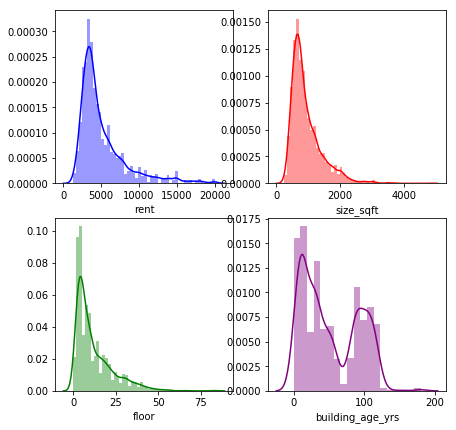

In [7]:
#exploratory analysis

import seaborn as sns

f, axes = plt.subplots(2, 2, figsize = (7,7) )
sns.distplot(df.rent, color="b", ax= axes[0,0])
sns.distplot(df.size_sqft, color="r", ax=axes[0, 1])
sns.distplot(df.floor, color="g", ax= axes[1,0])
sns.distplot(df.building_age_yrs, color="purple", ax=axes[1, 1])
#sns.distplot(df.size_sqft)


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


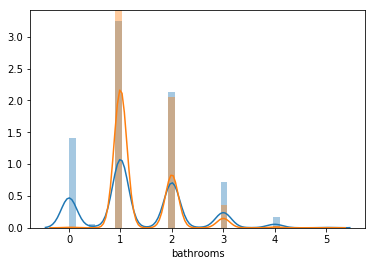

In [8]:
sns.distplot(df.bedrooms)
sns.distplot(df.bathrooms)

In [9]:
print(df.shape)
y = df['rent']
print(y.shape)

(3539, 18)
(3539,)


In [3]:
y = df['rent']
data = df.copy()
categorical= df[['neighborhood']]
data = data.drop(columns = ['rent','borough','rental_id','neighborhood'])
data.head()
print(data.shape)
print(y.shape)

(3539, 14)
(3539,)


In [13]:
categorical

,neighborhood
0,Upper East Side
1,Greenwich Village
2,Midtown
3,Greenwich Village
4,Soho
5,Central Harlem
6,Midtown East
7,Battery Park City
8,Flatiron
9,Upper East Side


In [4]:
##one hot encoding the variable
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

label = LabelEncoder()
label_categorical = pd.DataFrame(label.fit_transform(categorical))

label_categorical.head()

OH_categorical = pd.DataFrame(OH_encoder.fit_transform(label_categorical))


OH_categorical.index =  categorical.index
OH_categorical.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
all_data = pd.concat([data, OH_categorical], axis =1)

print(all_data.shape)
all_data.head()
print(y.shape)

(3539, 46)
(3539,)


In [19]:
train_x, test_x, train_y, test_y =  train_test_split(all_data, y)

print(all_data.shape, y.shape)
## this is not needed if using KFold method

ValueError: Found input variables with inconsistent numbers of samples: [3539, 3542]

## Modeling

In [6]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(all_data)
    rmse= np.sqrt(-cross_val_score(model, all_data, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [7]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1376.3710 (76.9565)



In [8]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1376.1841 (76.9600)



In [9]:
RandForr = RandomForestRegressor()
score =  rmsle_cv(RandForr)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

Random Forest score: 1334.6476 (32.2034)



In [10]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 1247.2497 (49.4393)



In [11]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 1207.1288 (55.6460)



### Averaging & Stacking Models

In [12]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [21]:
averaged_models = AveragingModels(models = (GBoost, KRR))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 1172.0304 (62.4087)



In [22]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [29]:
##Does Not Work
# stacked_averaged_models = StackingAveragedModels(base_models = (KRR, Lasso, RandForr),
#                                                  meta_model = GBoost)

# score = rmsle_cv(stacked_averaged_models)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [30]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [32]:
averaged_models.fit(all_data, y)
averaged_models_pred = averaged_models.predict(all_data)
averaged_pred = np.expm1(averaged_models.predict(all_data))



print(rmsle(y, averaged_models_pred))

918.1362058512891


In [ ]:
## Optional
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15


sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)